# Solución numérica de ecuaciones diferenciales ordinarias 
## (Método de Runge Kutta de orden 4)
<hr/>
##### El problema de valor inicial:

\begin{equation}
\left\{
	       \begin{array}{ll}
		 y' = f(x,y) \\
		 y(x_0) = y_0
	       \end{array}
	     \right.
\end{equation}

##### se puede resolver numéricamente usando métodos mas sofisticados que el de Euler, un ejemplo de ellos es el Runge-Kutta de orden 4 (RK4). Como es usual consideramos la solucion dentro de un intervalo $[x_0,x_f]$, tomamos $n$ divisiones uniformes del intervalo, de manera que tenemos la sucesion $[x_0, x_1, x_2, \dots, x_n]$ y calculamos la solucion $y(x)$ sobre cada punto de la sucesión siguiendo ahora este esquema:

\begin{equation}
\left\{
	       \begin{array}{ll}
		 x_{i+1} = x_i +\Delta x \\
		 y_{i+1} = y_i + \frac{\Delta x}{6} \left( s_1 + 2s_2 +2 s_3 +s_4 \right)
	       \end{array}
	     \right.
\end{equation}

##### donde: 

\begin{equation}
\left\{
	       \begin{array}{ll}
		 s_1 = f(x_i,y_i) \\
		 s_2 = f\left( x_i + \frac{\Delta x}{2},y_i + \frac{\Delta x}{2} s_1\right) \\
         s_3 = f\left( x_i + \frac{\Delta x}{2},y_i + \frac{\Delta x}{2} s_2\right) \\
         s_4 = f(x_i +\Delta x,y_i +\Delta x s_3)
	       \end{array}
	     \right.
\end{equation}

##### De aqui vemos que el método RK4 toma una mejor estimacion de la pendiente, ya que (dado un intervalo $[x_i,x_{i+1}]$) considera un promedio ponderado de la pendiente en el extremo izquierdo $s_1$, dos pendientes mejoradas en el punto medio $s_2$ y $s_3$ y una pendiente en el extremo derecho $s_4$. 

In [3]:
# funcion que implementa el método RK4
# -> (x0,y0): condicion inicial
# -> f      : f(x,y)
# -> nd  : número de divisiones
import numpy as np

def rk4(f,x0,y0,xf,nd):
    x    = np.zeros(nd)
    y    = np.zeros(nd)
    dx   = (xf-x0)/nd
    x[0] = x0
    y[0] = y0
    for i in range(nd-1):
        x[i+1] = x[i] + dx
        s1 = f(x[i],y[i])
        s2 = f(x[i]+0.5*dx,y[i]+0.5*dx*s1)
        s3 = f(x[i]+0.5*dx,y[i]+0.5*dx*s2)
        s4 = f(x[i]+dx,y[i]+dx*s3)
        y[i+1] = y[i] + (dx/6.0)*(s1+2*s2+2*s3+s4)
    return x, y

<hr/>
#### Consideremos como ejemplo sencillo el siguiente problema de valor inicial:
\begin{equation}
\left\{
	       \begin{array}{ll}
		 y' = ty + t^3 \\
		 y(0) = 1
	       \end{array}
	     \right.
\end{equation}

##### La solucion analítica de este problema se puede determinar por el método de factor integrante, según el cual dada una ecuacion diferencial en la forma  $y' + f(t) y = g(t)$, se sabe que la solución estará dada por:

\begin{equation}
    y(t) = \frac{\int g(t)\mu(t)dt + C}{\mu(t)}
\end{equation}

##### donde el factor integrante $\mu(t)$ se calcula como:

\begin{equation}
    \mu(t) = e^{\int f(t)dt}
\end{equation}

##### para este caso tenemos que $f(t) = -t$ y $g(t) = t^3$, de lo cual:

\begin{equation}
    \mu(t) = e^{\int -t dt} = e^{-t^2/2}
\end{equation}

##### entonces: 

\begin{equation}
    y(t) = \frac{\int t^3 e^{-t^2/2} dt + C}{e^{-t^2/2}} 
            = Ce^{t^2/2} -t^2 - 2
\end{equation}

##### Reemplazando la condicion inicial se obtiene que $C = 3$. Y finalmente la soución al problema de valor inicial esta dada por:

\begin{equation}
    y(t) = 3e^{t^2/2} -t^2 - 2
\end{equation}

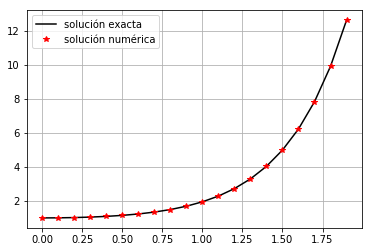

In [11]:
import math as ma
def f(x,y):
    return x*y + pow(x,3)
def ex_sol(x):
    return 3*ma.exp(x*x/2.0)-x*x-2

xx, yy = rk4(f,0,1,2,20)
import matplotlib.pyplot as plt
%matplotlib inline
vec_sol = np.vectorize(ex_sol)
plt.plot(xx,vec_sol(xx),'k',label = 'solución exacta')
plt.plot(xx,yy,'r*',label = 'solución numérica')
plt.legend()
plt.grid(True)

### TALLER DE CIERRE DE TEMA:
<hr/>
#### (PRIMER PUNTO - Euler vs RK4)
##### Considere los siguientes PVI:
* $y' = t + y$, $y(0)=0$
* $y' = t - y$, $y(0)=0$
* $y' = 4t - 2y$, $y(0)=0$

##### Para cada PVI: 
- Obtenga la solución analítica usando el método de factor integrante 
- Utilice los métodos de Euler y RK4 para obtener las soluciones numéricas correspondientes usando $\Delta x = 0.1$
- Gráfique las soluciones numericas junto con la exacta y compare cual método funciona mejor en cada caso.

#### (SEGUNDO PUNTO - Factorizacion LU)
##### ** La viga de Euler-Bernoulli **:  Este es un modelo básico para un material de flexión bajo esfuerzo. La idea es describir la deformacion del material en cada punto. El desplazamiento vertical de la viga esta dado en cada punto por $y(x)$ donde $ 0\leq x\leq L$. 
<img src="figuras/viga.png" alt="Alt text that describes the graphic" title="Title text" />

(tomado de https://en.wikipedia.org/wiki/Euler–Bernoulli_beam_theory)
##### Se tiene que el desplazamiento vertical $y(x)$ satisface la ecuación de Euler-Bernoulli:

\begin{equation}
    E I y'''' = f(x)
\end{equation}

##### donde E es el módulo de Young e I es el momento de inercia los cuales se consideran constantes a lo largo de la viga. Como vimos en los métodos para EDOs de primer orden la solucion se calcula sobre una sucesion de puntos usando una ecuacion en diferencias finitas que en el lenguaje técnico se conoce como una discretizacion de la EDO original. Como caso particular, se tomará que una discretizacion adecuada de la derivada $y''''$ viene dada por: 

\begin{equation}
    y''''(x) \simeq \frac{y(x-2\Delta x)-4y(x-\Delta x)+6y(x)-4y(x+\Delta x)+y(x+2\Delta x)}{\Delta x^4}
\end{equation}

##### considerando la discretizacion sobre $[x_0, x_1, x_2, \dots, x_n]$, se puede escribir la fórmula como:

\begin{equation}
    y''''(x) \simeq \frac{y_{i-2}-4y_{i-1}+6y_{i}-4y_{i+1}+y_{i+2}}{\Delta x^4}
\end{equation}

##### de esta manera la discretizacion de la ecuacion de Euler-Bernoulli se puede escribir como:

\begin{equation}
    y_{i-2}-4y_{i-1}+6y_{i}-4y_{i+1}+y_{i+2} 
            = \frac{\Delta x^4}{EI}f(x_i)
\end{equation}

##### Es importante notar que aquí, a diferencia de los métodos anteriores,  no es posible ir calculando la sucesion de $y_i$ simplemente usando el valor anterior. La discretizacion anterior representa realmente un sistema de n ecuaciones con n incógnitas cuando se toma $i = 0,1,\dots,n$. Ahora solo falta tener en cuenta condiciones sobre los extremos de la viga (en este caso no se habla de condiciones iniciales), para ello tomaremos las condiciones de **viga anclada-libre **, dadas por:

\begin{equation}
    y(0) = y'(0) = y''(L) = y'''(L) = 0
\end{equation}

##### De aquí se tiene que $y_0 = 0$.  Sin embargo tomando la ecuacion discretizada para determinar $y_1$ se tiene que:

\begin{equation}
    y_{-1}-4y_{0}+6y_{1}-4y_{2}+y_{3} 
            = \frac{\Delta x^4}{EI}f(x_1)
\end{equation}

##### y se evidencia el problema de que no se tiene definido el valor $y_{-1}$. En este caso debido al problema de frontera consideraremos una aproximacion diferente para la derivada $y''''$ de $y_1$, dada por:

\begin{equation}
    y''''(x_1) \simeq \frac{16y_{1}-9y_{2}+
    \frac{8}{3}y_{3}-\frac{1}{4}y_{4}}{\Delta x^4}
\end{equation}

##### entonces:

\begin{equation}
    16y_{1}-9y_{2}+\frac{8}{3}y_{3}-\frac{1}{4}y_{4} = 
        \frac{\Delta x^4}{EI} f(x_1)
\end{equation}

##### Para el extremo derecho de la viga tambien se evidencia problemas de frontera, razon por la cual son necesarias discretizaciones diferentes para los puntos $y_n$ e $y_{n-1}$, dadas por:

\begin{equation}
\left\{
	\begin{array}{ll}
		 y''''(x_{n-1}) =\frac{-28y_n+72y_{n-1}-60y_{n-2}+16y_{n-3}}{17\Delta x^4} \\
		 y''''(x_n) = \frac{72y_n-156y_{n-1}+96y_{n-2}-12y_{n-3}}{17\Delta x^4}
	\end{array}
	\right.
\end{equation}

##### las cuales son válidas con el supuesto de que $y''(x_n) = y'''(x_n) = 0 $. Ahora realice los siguientes pasos:
 - Demuestre que el conjunto de ecuaciones con las modificaciones en las fronteras puedes escribirse en la siguiente forma matricial:

\begin{equation}
    \begin{bmatrix}
        16 & -9 & \frac{8}{3} & \frac{-1}{4} & & & & &  \\
        -4 & 6 & -4 & 1 & & & & & \\
        1 & -4 & 6 & -4 & 1 & & & & \\
         & 1 & -4 & 6 & -4 & 1 & & & \\
         & & \ddots & \ddots & \ddots & \ddots & \ddots & & \\
         & & & 1 & -4 & 6 & -4 & 1 & \\
         & & & & 1 & -4 & 6 & -4 & 1 \\
          & & & & & \frac{16}{17} & \frac{-60}{17} & \frac{72}{17} & 
          \frac{-28}{17} \\
          & & & & & \frac{-12}{17} & \frac{96}{17} & \frac{-156}{17} & 
          \frac{72}{17}
    \end{bmatrix} \begin{bmatrix}
        y_1 \\
        y_2 \\
        \vdots \\
        \vdots \\
        \vdots \\
        \vdots \\
        \vdots \\
        y_{n-1} \\
        y_n 
    \end{bmatrix} = \frac{\Delta x^4}{EI}\begin{bmatrix}
        f(x_1) \\
        f(x_2) \\
        \vdots \\
        \vdots \\
        \vdots \\
        \vdots \\
        \vdots \\
        f(x_{n-1})\\
        f(x_n)
    \end{bmatrix}
\end{equation}

 - En el caso anterior la matriz de coeficientes $A$ se suele llamar matriz de estructura. Con el sistema de ecuaciones anterior ya es posible modelar la viga (deberá usar Factorizacion LU para resolverlo), considere ahora $L=2$ m, tome $E = I = 1$ y tome $f(x) = -g$, donde $g$ es la aceleración gravitacional. Con los parámetros previos resuelva el sistema y obtenga la solucion de $y(x)$, grafique la funcion y describa como es la deformacion de la viga.